# Monetary Economics: Chapter 3

From "Monetary Economics: An Integrated Approach to Credit, Money, Income, Production and Wealth, 2nd ed" by Wynne Godley and Marc Lavoie, 2012.

## The Simplest Model with Government Money, Model SIM

Assumptions
* No private money, only Government money (no private banks)
* No profits, *pure labor economy*
* Fixed price of labor, unlimited quantity of labor, thus the economy is not supply-constrained.

## Transactions matrix for Model SIM

||1.Households|2.Production|3.Government|&Sigma;|
|-------|:------:|:--------:|:--:|-----|
|1.Consumption|-C|+C||0|
|2.Govt expenditures||+G|-G|0|
|3.[Output]||[Y]|||
|4.Factor income (wages)|+WB|-WB||0|
|5.Taxes|-T||+T|0|
|6.Change in the stock of money|-&Delta;H||+&Delta;H|0|
|&Sigma;|0|0|0|0|

Definition of terms

* **C** : Consumption goods demand by households

* **G** : Government expenditures

* **Y** : National income

* **WB** : Wage bill

* **T** : Taxes

* **&Delta;H** : Change in cash money

In this model, people (as consumers and producers of income) have been separated.

## Behavioral (transactions) matrix for Model SIM

||1.Households|2.Production|3.Government|&Sigma;|
|----------|:----------:|:----------:|:---:||
|1.Consumption|-Cd|+Cs||0|
|2.Govt expenditures||+Gs|-Gd|0|
|3.[Output]||[Y]|||
|4.Factor income (wages)|+W&bull;Ns|-W&bull;Nd||0|
|5.Taxes|-Ts||+Td|0|
|6.Change in the stock of money|-&Delta;Hh||+&Delta;Hs|0|
|&Sigma;|0|0|0|0|

Differences from previous matrix:
* Each transaction has a suffix, *s*, *d*, and *h*.
    * *s* supply
    * *d* demand
    * *h* household cash
* The Wage Bill (WB) has been separated into two parts.
    * *W* Wage rate
    * *N* employment

Definition of terms
* **Cd** : Consumption goods demand by households
* **Cs** : Consumption goods supply by firms
* **Gs** : Services supplied by the government
* **Gd** : Services demanded from government 
* **Y** : National income
* **W** : Wage rate
* **Ns** : Supply of labor
* **Nd** : Demand for labor
* **Ts** : Taxes supplied
* **Td** : Taxes demanded by government
* **&Delta;Hh** : Change in cash money held by households
* **&Delta;Hs** : Change in cash money supplied by the central bank

## Model SIM

> From here, I will be building the model in code.
> Because this is the first model, the Python code will
> be explained in more detail also.

**Important:** Use sympy version 0.7.5

The following piece of code is necessary to show the graphics inline for iPython notebooks. To view the graphs, matplotlib is required.

In [1]:
# This line configures matplotlib to show figures embedded in the notebook, 
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline

from pysolve3.model import Model
from pysolve3.utils import is_close,round_solution

import matplotlib.pyplot as plt

###### Preliminaries

In order to build the model, we must first start off by importing several modules that will be used to build the model. *pysolve* is a Python module that I have developed to make it easier to specify and solve linear models.

The first line will import the main Model class.  The second line imports several utility functions that will prove useful.

In [2]:
from pysolve3.model import Model
from pysolve3.utils import is_close,round_solution

###### Create the model

The first step when developing a pysolve model is to create the model.  This is just an empty model for now, but we will be adding the rest of the information to this.

In [3]:
model = Model()

###### Define the variables

The second step is to define the (endogenous) variables.  These are the variables that we are allowed to manipulate within the model.  This is pretty straigtforward.

As a useful step, I define the default value for all variables.  This can be changed on an individual basis.  This is the value that the variable will start off with if nothing is changed.

In [4]:
model.set_var_default(0)

Next, we create the variables used by the sim.  Most of these have been explained above.

In [5]:
model.var('Cd', desc='Consumption goods demand by households')
model.var('Cs', desc='Consumption goods supply')
model.var('Gs', desc='Government goods, supply')
model.var('Hh', desc='Cash money held by households')
model.var('Hs', desc='Cash money supplied by the government')
model.var('Nd', desc='Demand for labor')
model.var('Ns', desc='Supply of labor')
model.var('Td', desc='Taxes, demand')
model.var('Ts', desc='Taxes, supply')
model.var('Y', desc='Income = GDP')
model.var('YD', desc='Disposable income of households');

As an aside, multiple variables can be created by the following code.  But the above is more descriptive.

```python
model.vars('Y', 'YD', 'Ts', 'Td', 'Hs', 'Hh', 'Gs', 'Cs',
           'Cd', 'Ns', 'Nd')
```

The value of the variables may also be changed mid-iteration.  They will then be used to seed the value of the next iteration.

For example
```python
varx = model.var('x')

# ... later
varx.value = 22
# this will also work
model.variables['x'].value = 22
```

Aside: the semicolon ';' at the end of the last line of code is an iPython artifact, and is not needed by the python code. It is used to suppress output by the iPython interpreter.

###### Define the parameters

The next step is to define the parameters. I do not differentiate between exogenous variables and parameters since both are set outside of the model. The solver will not be able to change these values.  However, the user may change these values between calls to the solver.

Like the variables, there is a call that may be made to set a default value for all parameters, but I will be creating the parameters with their default values.  The call would look like this
```python
model.set_parameter_initial(1.0)
```

In addition the parameter values could be changed like this:
```python
Gd = model.param('Gd', initial=10)
# ...
# at some later time
Gd.value = 20
# or this would work also
model.parameters['Gd'].value = 20
```

Some of the parameters (alpha1, alpha2 and theta) have not been explained yet, but will be explained when we add the equations that use them.

In [6]:
model.param('Gd', desc='Government goods, demand', default=20.)
model.param('W', desc='Wage rate', default=1.)
model.param('alpha1', desc='Propensity to consume out of income', default=0.6)
model.param('alpha2', desc='Propensity to consume o of wealth', default=0.4)
model.param('theta', desc='Tax rate', default=0.2);

###### Define the equations

Adding an equation is just adding the textual form of the equation.  There are some restrictions. Linear systems only.

In [7]:
model.add('Cs = Cd')
model.add('Gs = Gd')
model.add('Ts = Td')
model.add('Ns = Nd');

These four equations imply that demand equals supply for this period, no supply constraints of any kind.

In [8]:
model.add('YD = (W*Ns) - Ts');

Disposable income (*YD*) is the wages earned by households minus taxes.

In [9]:
model.add('Td = theta * W * Ns');

Taxes are a fixed proportion (*theta*) of income.  *theta* is decided by the government and is exogenous to the model.

In [10]:
model.add('Cd = alpha1*YD + alpha2*Hh(-1)');

This is a consumption function, the rates at which housholds consume.  This is a combination of consumption of inherited wealth (*Hh(-1)*) and post-tax income (*YD*).

In [11]:
model.add('Hs - Hs(-1) =  Gd - Td');

This comes from the transaction-flow matrix and represents the governments budget constraint.  Government expenditures that are not paid for by taxes (*Gd-Td*), must be covered by differences in the money supply.

In [12]:
model.add('Hh - Hh(-1) = YD - Cd');

The difference in the cash that households carry is the difference between their income and their consumption.

In [13]:
model.add('Y = Cs + Gs');

The determination of national income.

In [14]:
model.add('Nd = Y/W');

The determination of employment.

We now have 11 equations and 11 unknowns. **Each of the eleven unknowns has been set on the left-hand side of an equation** (This implies that we can use the Gauss-Seidel algorithm to iterate to a solution, convergence is not guaranteed but we can try.)

###### Solve

We have set the default for all of the variables to 0, and that will be used as an initial solution.

In [15]:
model.solve(iterations=100, threshold=1e-4);

In [16]:
prev = round_solution(model.solutions[-2], decimals=1)
solution = round_solution(model.solutions[-1], decimals=1)
print("Y         : " + str(solution['Y']))
print("T         : " + str(solution['Ts']))
print("YD        : " + str(solution['YD']))
print("C         : " + str(solution['Cs']))
print("Hs-Hs(-1) : " + str(solution['Hs'] - prev['Hs']))
print("Hh-Hh(-1) : " + str(solution['Hh'] - prev['Hh']))
print("H         : " + str(solution['Hh']))

Y         : 38.5
T         : 7.7
YD        : 30.8
C         : 18.5
Hs-Hs(-1) : 12.3
Hh-Hh(-1) : 12.3
H         : 12.3


### The code for the full model

To make the model easier to manipulate, I will encapsulate model creation into a single function.

In [17]:
def create_sim_model():
    model = Model()

    model.set_var_default(0)
    model.var('Cd', desc='Consumption goods demand by households')
    model.var('Cs', desc='Consumption goods supply')
    model.var('Gs', desc='Government goods, supply')
    model.var('Hh', desc='Cash money held by households')
    model.var('Hs', desc='Cash money supplied by the government')
    model.var('Nd', desc='Demand for labor')
    model.var('Ns', desc='Supply of labor')
    model.var('Td', desc='Taxes, demand')
    model.var('Ts', desc='Taxes, supply')
    model.var('Y', desc='Income = GDP')
    model.var('YD', desc='Disposable income of households')

    model.param('Gd', desc='Government goods, demand')
    model.param('W', desc='Wage rate')
    model.param('alpha1', desc='Propensity to consume out of income')
    model.param('alpha2', desc='Propensity to consume out of wealth')
    model.param('theta', desc='Tax rate')

    model.add('Cs = Cd')  # 3.1
    model.add('Gs = Gd')  # 3.2
    model.add('Ts = Td')  # 3.3
    model.add('Ns = Nd')  # 3.4
    model.add('YD = (W*Ns) - Ts') # 3.5
    model.add('Td = theta * W * Ns')  # 3.6, theta < 1.0
    model.add('Cd = alpha1*YD + alpha2*Hh(-1)') # 3.7, 0 < alpha2 < alpha1 < 1
    model.add('Hs - Hs(-1) =  Gd - Td')  # 3.8
    model.add('Hh - Hh(-1) = YD - Cd') # 3.9
    model.add('Y = Cs + Gs') # 3.10
    model.add('Nd = Y/W') # 3.11
    
    return model


Now we can run the simulation using the model.

In [18]:
model = create_sim_model()
model.set_values({'alpha1': 0.6,
                  'alpha2': 0.4,
                  'theta': 0.2,
                  'Gd': 20,
                  'W': 1})
model.solve(iterations=100, threshold=1e-5)

prev = round_solution(model.solutions[-2], decimals=1)
solution = round_solution(model.solutions[-1], decimals=1)
print("Y         : " + str(solution['Y']))
print("T         : " + str(solution['Ts']))
print("YD        : " + str(solution['YD']))
print("C         : " + str(solution['Cs']))
print("Hs-Hs(-1) : " + str(solution['Hs'] - prev['Hs']))
print("Hh-Hh(-1) : " + str(solution['Hh'] - prev['Hh']))
print("H         : " + str(solution['Hh']))

Y         : 38.5
T         : 7.7
YD        : 30.8
C         : 18.5
Hs-Hs(-1) : 12.3
Hh-Hh(-1) : 12.3
H         : 12.3


### Steady-state solution

We now generate the steady-state solution by iterating until the solutions converge.

In [19]:
steady_state = create_sim_model()
steady_state.set_values({'alpha1': 0.6,
                         'alpha2': 0.4,
                         'theta': 0.2,
                         'Gd': 20,
                         'W': 1})
for _ in range(100):
    steady_state.solve(iterations=100, threshold=1e-5)

    prev_soln = steady_state.solutions[-2]
    soln = steady_state.solutions[-1]
    if is_close(prev_soln, soln, atol=1e-4):
        break

prev = round_solution(steady_state.solutions[-2], decimals=1)
solution = round_solution(steady_state.solutions[-1], decimals=1)
print("Y         : " + str(solution['Y']))
print("T         : " + str(solution['Ts']))
print("YD        : " + str(solution['YD']))
print("C         : " + str(solution['Cs']))
print("Hs-Hs(-1) : " + str(solution['Hs'] - prev['Hs']))
print("Hh-Hh(-1) : " + str(solution['Hh'] - prev['Hh']))
print("H         : " + str(solution['Hh']))


Y         : 100.0
T         : 20.0
YD        : 80.0
C         : 80.0
Hs-Hs(-1) : 0.0
Hh-Hh(-1) : 0.0
H         : 80.0


###### Table 3.4

We can also generate table 3.4

In [20]:
from IPython.display import HTML
import numpy
from pysolve3.utils import generate_html_table

data = list()
for var in [('Gd', 'G'), ('Y', 'Y'), ('Ts', 'T'), ('YD', 'YD'), ('Cs', 'C')]:
    rowdata = list()
    rowdata.append(var[1])
    for i in [0, 1, 2, -1]:
        rowdata.append(str(numpy.round(steady_state.solutions[i][var[0]], decimals=1)))
    data.append(rowdata)

for var in [('Hs', '&Delta;Hs'), ('Hh', '&Delta;Hh')]:
    rowdata = list()
    rowdata.append(var[1])
    rowdata.append(str(numpy.round(steady_state.solutions[0][var[0]], decimals=1)))
    for i in [1, 2, -1]:
        rowdata.append(str(numpy.round(steady_state.solutions[i][var[0]] - 
                                       steady_state.solutions[i-1][var[0]], decimals=1)))
    data.append(rowdata)

for var in [('Hh', 'H')]:
    rowdata = list()
    rowdata.append(var[1])
    for i in [0, 1, 2, -1]:
        rowdata.append(str(numpy.round(steady_state.solutions[i][var[0]], decimals=1)))
    data.append(rowdata)

s = generate_html_table(['Period', '1', '2', '3', '&infin;'], data)
HTML(s)

Period,1,2,3,∞
G,20.0,20.0,20.0,20.0
Y,0.0,38.5,47.9,100.0
T,0.0,7.7,9.6,20.0
YD,0.0,30.8,38.3,80.0
C,0.0,18.5,27.9,80.0
ΔHs,0.0,12.3,10.4,0.0
ΔHh,0.0,12.3,10.4,0.0
H,0.0,12.3,22.7,80.0


### Scenario: Model SIM, increase government expenditures

In [21]:
step_model = create_sim_model()
step_model.set_values({'alpha1': 0.6,
                       'alpha2': 0.4,
                       'theta': 0.2,
                       'Gd': 20,
                       'W': 1})

# Use the steady state solution as a starting point
step_model.solutions = steady_state.solutions[-2:]
for i in range(45):
    step_model.solve(iterations=100, threshold=1e-5)
    if i == 2:
        step_model.parameters['Gd'].value += 5

###### Figure 3.1

Calculate the solution but with an permanent increase in government expenditures (+5) and starting from the steady state solution.

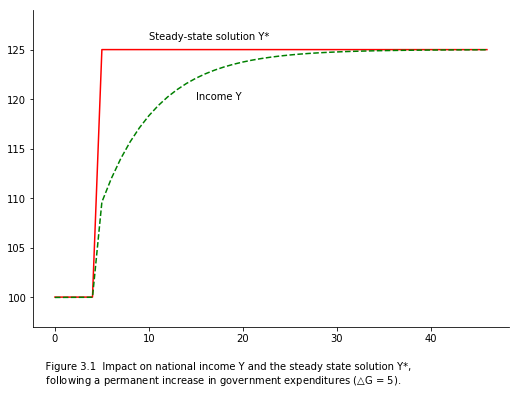

In [22]:
caption = '''
    Figure 3.1  Impact on national income Y and the steady state solution Y*,
    following a permanent increase in government expenditures ($\\bigtriangleup$G = 5).'''

gdata = [s['Gd']/s['theta'] for s in step_model.solutions]
ydata = [s['Y'] for s in step_model.solutions]

# Now graph G/theta and Y
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(97, 129)

axes.plot(gdata, 'r')  # plot G/theta
axes.plot(ydata, linestyle='--', color='g')  # plot Y

# add labels
plt.text(10, 126, 'Steady-state solution Y*')
plt.text(15, 120, 'Income Y')
fig.text(.1, -.1, caption);

###### Figure 3.2

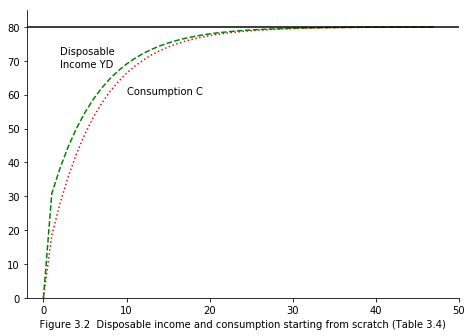

In [23]:
caption = '''
    Figure 3.2  Disposable income and consumption starting from scratch (Table 3.4)'''
cdata = [s['Cd'] for s in steady_state.solutions]
yddata = [s['YD'] for s in steady_state.solutions]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.0, 1.0])
axes.tick_params(top=False, right=False)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0, 85)
axes.set_xlim(-2, 50)

axes.plot(cdata, linestyle=':', color='r')  # plot C
axes.plot(yddata, linestyle='--', color='g')  # plot YD
plt.axhline(y=80, color='k')

# add labels
plt.text(2, 72, 'Disposable')
plt.text(2, 68, 'Income YD')
plt.text(10, 60, 'Consumption C')
fig.text(0.1, 0, caption);


###### Figure 3.3

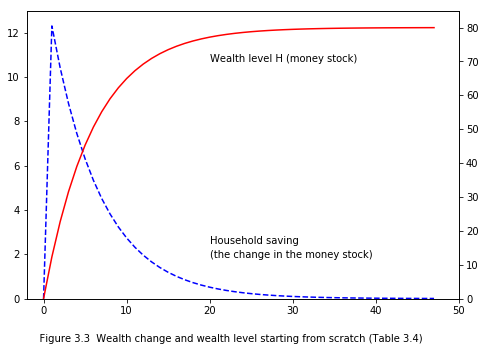

In [24]:
caption = '''
    Figure 3.3  Wealth change and wealth level starting from scratch (Table 3.4)'''

hdata = [s['Hh'] for s in steady_state.solutions]
deltahdata = [s['Hh'] for s in steady_state.solutions]
for i in range(1, len(steady_state.solutions)):
    deltahdata[i] -= hdata[i-1]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.0, 1.0])
axes.tick_params(top=False)
axes.set_ylim(0, 13)
axes.set_xlim(-2, 50)
axes.plot(deltahdata, linestyle='--', color='b')

axes2 = axes.twinx()
axes2.set_ylim(0, 85)
axes2.set_xlim(-2, 50)
axes2.plot(hdata, 'r')

# add labels
plt.text(20, 16, 'Household saving')
plt.text(20, 12, '(the change in the money stock)')
plt.text(20, 70, 'Wealth level H (money stock)')

fig.text(0.1, -0.05, caption);


###### Figure 3.4

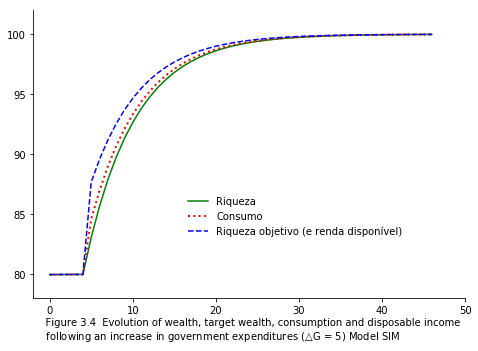

In [25]:
caption = '''
    Figure 3.4  Evolution of wealth, target wealth, consumption and disposable income
    following an increase in government expenditures ($\\bigtriangleup$G = 5) Model SIM '''
hdata = [s['Hh'] for s in step_model.solutions]
cdata = [s['Cs'] for s in step_model.solutions]
vtdata = [s['YD']*(1.-s['alpha1'])/s['alpha2'] for s in step_model.solutions]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.0, 1.0])
axes.tick_params(top=False, right=False)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(78, 102)
axes.set_xlim(-2, 50)
axes.plot(hdata, linestyle='-', color='g', label='Riqueza')
axes.plot(cdata, linestyle=':', color='r', linewidth=2, label='Consumo')
axes.plot(vtdata, linestyle='--', color='b', label='Riqueza objetivo (e renda disponível)')

plt.legend(loc=(0.35,0.2), frameon=False)

fig.text(0.1, -0.05, caption);


### Scenario: Model SIM, increase propensity to consume

In [26]:
alpha_model = create_sim_model()
alpha_model.set_values({'alpha1': 0.6,
                        'alpha2': 0.4,
                        'theta': 0.2,
                        'Gd': 20,
                        'W': 1})

# Use the steady state solution as a starting point
alpha_model.solutions = steady_state.solutions[-2:]
for i in range(50):
    alpha_model.solve(iterations=100, threshold=1e-4)
    if i == 2:
        alpha_model.parameters['alpha1'].value = 0.7

###### Figure 3.8

We will need to generate solutions that involve a change in alpha1 (from 0.6 to 0.7).

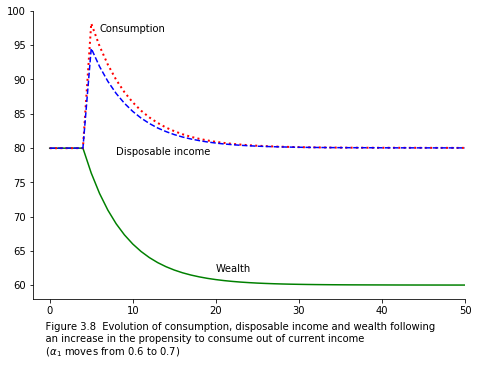

In [27]:
caption = '''
    Figure 3.8  Evolution of consumption, disposable income and wealth following
    an increase in the propensity to consume out of current income 
    ($\\alpha_1$ moves from 0.6 to 0.7)'''
hdata = [s['Hh'] for s in alpha_model.solutions]
cdata = [s['Cs'] for s in alpha_model.solutions]
vtdata = [s['YD'] for s in alpha_model.solutions]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.0, 1.0])
axes.tick_params(top=False, right=False)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(58, 100)
axes.set_xlim(-2, 50)
axes.plot(hdata, linestyle='-', color='g')
axes.plot(cdata, linestyle=':', color='r', linewidth=2)
axes.plot(vtdata, linestyle='--', color='b')

plt.text(6, 97, 'Consumption')
plt.text(8, 79, 'Disposable income')
plt.text(20, 62, 'Wealth')

fig.text(0.1, -0.1, caption);
